<a href="https://colab.research.google.com/github/vn322/Cod_future/blob/main/Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scikit-learn - одна из наиболее популярных библиотек Python для Data Science и Machine Learning. Она позволяет выполнять большое количество операций и предоставляет множество алгоритмов. Scikit-learn также предлагает отличную документацию, в том числе и на русском языке описывающую классы, методы и функции библиотеки, а также описание  алгоритмов с необходимыми сведениями из математики.

Scikit-Learn имеет в своём составе методы для:

- предварительной обработки данных;
- уменьшения размерности;
- подбора гиперпараметров  модели;
- регрессии;
- классификации;
- кластерного анализа
- и многое другое

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Для реализации алгоритмов машинного обучения желательно иметь достаточно большой набор данных, иначе теряется сам смысл применения сложных инструментов. Для работы мы используем набор данных [League of Legends Diamond Ranked Games (10 min)](https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min), который содержит  статистику 9879 рейтинговых игр (SOLO QUEUE) с высоким рейтингом ELO  (DIAMOND I - MASTER)за первые 10 минут игры.

In [2]:
lol = pd.read_csv('https://raw.githubusercontent.com/vn322/Sport-University/main/esport/high_diamond_ranked_10min.csv')
lol.head(3)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


In [3]:
lol.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

# Разделение данных

Разделение набора данных в Scikit-learn решено функцией `sklearn.model_selection.train_test_split`. Сначала нужно определить целевую (зависимую) переменную, у нас это будет индикатор `blueWins` принимающий значение "1" в случае победы команды синих, и "0" - в случае поражения.

После определения целевой переменной необходимо разделить данные. Ведь нельзя оценить прогностическую эффективность модели на тех же данных, которые  использовались для её обучения.

In [4]:
X=lol[['blueKills','blueDeaths','blueWardsPlaced', 'blueWardsDestroyed',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAssists','blueTotalMinionsKilled']]
y=lol['blueWins']

Чтобы объективно проверить точность  модели на данных, которые модель "не видела",  набор данных делят на две неравные части — тренировочный и тестовый набор . Тренировочный набор применяется для обучения модели, поэтому его делают большим, чтобы модель имела достаточно возможностей для обучения, а тестовый меньшим, достаточным для проверки.

В следущем примере данные будут разделены в соотношении 70/30, т. е. 70% данных будут использоваться как
 данные для тренировки (обучения) модели, а 30% будут использоваться в качестве тестовых данных.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6915, 8)
(2964, 8)
(6915,)
(2964,)


Проверим корректность  разделения данных по количеству и составу.

In [6]:
X.iloc[[2]]

,blueKills,blueDeaths,blueWardsPlaced,blueWardsDestroyed,blueTowersDestroyed,blueTotalGold,blueAssists,blueTotalMinionsKilled
2,7,11,15,0,0,16113,4,186


In [7]:
y.iloc[[2]]

2    0
Name: blueWins, dtype: int64

# Алгоритмы машинного обучения Scikit-Learn

Более подробно применение каждого алгоритма мы разберём в следующем модуле, а сейчас сосредоточимся на рассмотрении возможностей именно библиотеки Scikit-Learn.

У Scikit-learn единый способ использования всех методов.
Для моделей (estimator object) доступны следующие методы.

- `model.fit()` – настройка на данные (обучение)

- `model.fit(X, y)` – для обучения с учителем (supervised learning)

- `model.fit(X)` – для обучение без учителя (unsupervised learning)

Для обучения с учителем:

`model.predict(X_test)` – предсказать значения целевой переменной

`model.predict_proba()` – выдать «степень уверенности» в ответе
(вероятность) – для некоторых моделей

`model.decision_function()` – решающая функция – для некоторых
моделей

`model.score()` – в большинстве моделей встроены методы оценки их
качества работы

`model.transform()` – для отбора признаков (feature selection)
«сжимает» обучающую матрицу. Для регрессионных моделей и
классификаторов (linear, RF и т.п.) выделяет наиболее
информативные признаки

# Логистическая регрессия

Начнём с классификации при помощи логистической регрессии. Обучим модель и предложим ей сделать прогноз на строке с индексом 2. В нашем наборе данных для данной строки целевая переменная равна 0, что значит поражение и прогноз так же равен 0. Однако, если мы подставим строку с индексом 1, то увидим, что модель даст ошибочный прогноз, поэтому необходимо понять с какой точностью делается прогноз и насколько он может быть надёжным.

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
classifier.predict(X.iloc[[2]])

array([0])

Для оценки будем использовать штатный метод `score(X, y[, sample_weight])` который возвращает Accuracy - отношение точных прогнозов к общему их количеству или точнее

$$\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN}$$

где

TP - истинные положительные результаты (True Positive) прогноз совпал с реальностью

TN - истинные отрицательные результаты, (True Negative) , прогноз совпал с реальностью

FP - ложные положительные результаты (False Positive) ошибка 1-го рода, модель прогнозировала положительный результат, а на самом деле он отрицательный

FN - ложные отрицательные результаты (False Negative) ошибка 2-го рода, модель прогнозировала отрицательный результат, но на самом деле он положительный

И в данных условиях для данной модели получим точность 0.7, что безусловно неплохой результат, но место для ошибки остаётся и желательно точнее определить сколько и каких ошибок ожидается при пользовании моделью.

In [9]:
classifier.score(X_test, y_test)

0.7064777327935222

С целью оценки прогноза используется матрица ошибок (confusion matrix) – таблица с 4 различными комбинациями прогнозируемых и фактических значений. Прогнозируемые значения описываются как положительные и отрицательные, а фактические – как истинные и ложные. Вообще матрица ошибок используется для оценки точности моделей в задачах классификации. Но многие другие задачи можно рассматривать как частный случай этой проблемы, поэтому confusion matrix актуальна и для измерения точности прогноза. Важно, что матрица ошибок позволяет оценить эффективность прогноза не только в качественном, но и в количественном выражении

In [10]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1037  443]
 [ 427 1057]]


Не всегда числа хорошо воспринимаются нашим сознанием  и поэтому, при возможности, желательно визуализировать результаты исследования.

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(classifier, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

ROC — Receiver Operating Characteristic (рабочая характеристика приёмника). Впервые она была создана для использования радиолокационного обнаружения сигналов во время Второй мировой войны. США использовали ROC для повышения точности обнаружения японских самолетов с помощью радара.

Матрица ошибок содержит только абсолютные числа. Однако, используя их, мы можем получить множество других метрик, основанных на процентных соотношениях.

Так вводят: True Positive Rate (TPR) и False Positive Rate (FPR)

True Positive Rate (TPR) показывает, какой процент среди всех positive верно предсказан моделью.
$$TPR = TP / (TP + FN)$$

False Positive Rate (FPR): какой процент среди всех negative неверно предсказан моделью.
$$FPR = FP / (FP + TN)$$

AUC или area under curve — это просто площадь под кривой ROC. А кривая ROC — это просто отношение TPR к FPR.

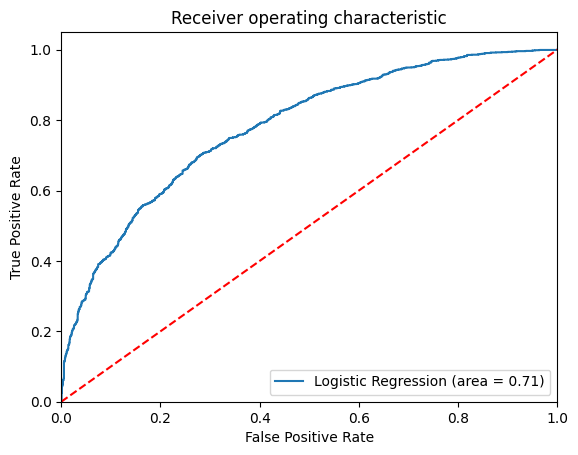

In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

При использовании моделей классификации в машинном обучении есть несколько общих показателя, которые применяются для оценки качества модели:

1. **precision** - процент правильных положительных прогнозов по отношению к общему количеству положительных прогнозов.

2. **recall** - процент правильных положительных прогнозов по отношению к общему количеству фактических положительных результатов.


$${\displaystyle {\begin{aligned}{\text{Precision}}&={\frac {TP}{TP+FP}}\\{\text{Recall}}&={\frac {TP}{TP+FN}}\,\end{aligned}}}$$
3. **f1-score** - средневзвешенное гармоническое значение точности и полноты. Чем ближе к 1, тем лучше модель.

$$
{\displaystyle F_1=2\cdot {\frac {\mathrm {Precision} \cdot \mathrm {Recall} }{\mathrm {Precision} +\mathrm {Recall} }}}
$$
Используя эти три показателя, мы можем понять, насколько хорошо данная модель классификации способна предсказывать результаты для некоторой переменной отклика .

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70      1480
           1       0.70      0.71      0.71      1484

    accuracy                           0.71      2964
   macro avg       0.71      0.71      0.71      2964
weighted avg       0.71      0.71      0.71      2964



# Ансамблевые методы

Цель ансамблевых методов — объединить прогнозы нескольких базовых оценок, построенных с заданным алгоритмом обучения, чтобы улучшить надежность по сравнению с одной оценкой.

Обычно выделяют два семейства ансамблевых методов:

В методах усреднения главный принцип состоит в том, чтобы  усреднить прогнозы . В среднем, комбинированная оценка обычно лучше, чем любая из оценок с одной моделью, потому что ее дисперсия имеет тенденцию к уменьшению.

Напротив, в методах с использованием бустинга оценки строятся последовательно, и каждая следующая пытается уменьшить смещение комбинированной оценки.


Используем популярный алгоритм классификации "Решающее дерево" и получим для него оценку штатным методом `score` отражающий среднюю точность (mean accuracy) равную 0.6740890688259109

## Решающее дерево

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train, y_train)
print (tree)
print (tree.score(X_test, y_test))
print (tree.predict(X.iloc[[1]]))

DecisionTreeClassifier(max_depth=10)
0.6744264507422402
[0]


## Случайный  лес

Используя же метод "Случайного леса", который прпедставляет из себя усреднённую оценку нескольких "Решающих деревьев" получим уже среднюю точность равную 0.7068151147098516

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
print (rf.score(X_test, y_test))
print (rf.predict(X.iloc[[1]]))

0.7068151147098516
[0]


In [18]:
from sklearn.metrics import classification_report
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1480
           1       0.71      0.69      0.70      1484

    accuracy                           0.71      2964
   macro avg       0.71      0.71      0.71      2964
weighted avg       0.71      0.71      0.71      2964



## Gradient boosting

Gradient boosting — это метод машинного обучения, используемый в задачах как регрессии, так и классификации. Он создает модель прогнозирования в виде ансамбля более слабых моделей, которые обычно представляют собой деревья решений.  Обычно он превосходит случайный лес. Модель деревьев с градиентным усилением строится поэтапно, как и в других методах повышения, но она обобщает другие методы, позволяя оптимизировать произвольную дифференцируемую функцию потерь.

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
grb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X_train, y_train)
grb.score(X_train, y_train)

0.7297180043383948

С этим методом мы можем ещё немного улучшить среднюю точность и теперь она равна 0.7128879892037787

In [20]:
grb.score(X_test, y_test)


0.7128879892037787

In [21]:
grb.predict(X.iloc[[1]])

array([0])

In [22]:
from sklearn.metrics import classification_report
y_pred = grb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1480
           1       0.71      0.71      0.71      1484

    accuracy                           0.71      2964
   macro avg       0.71      0.71      0.71      2964
weighted avg       0.71      0.71      0.71      2964



In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print (knn)
print (knn.score(X_test, y_test))

KNeighborsClassifier()
0.6497975708502024


# Метод опорных векторов

Метод опорных векторов (support vector machine) — набор схожих алгоритмов обучения с учителем, использующихся для задач классификации и регрессионного анализа.  Особым свойством метода опорных векторов является непрерывное уменьшение эмпирической ошибки классификации и увеличение зазора, поэтому метод также известен как метод классификатора с максимальным зазором.

In [24]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.7186234817813765

In [25]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70      1480
           1       0.70      0.77      0.73      1484

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964



 Стандартизация наборов данных является общим требованием для многих средств  машинного обучения, реализованных в scikit-learn; они могут не вполне корректно работать, если данные не распределены нормально.

`StandardScaler` используется для изменения размера распределения значений так, чтобы среднее значение наблюдаемых значений было равно 0, а стандартное отклонение – 1.
Этот метод часто является этапом препроцессинга  (предварительной обработки данных).

Метод используется если характеристики  набора данных сильно различаются по размаху или, когда  измеряются в разных единицах измерения.


In [26]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)

0.7139001349527665

данные можно улучшать различными способами, нпраимер метод `get_dummies` позволяет из категориальных переменных получать так называемые "фиктивные", т.е представлять их числами для дальнейшей обработки моделью.

Создадим категориальную переменную на основе нашего набора данных.

In [27]:
df = lol[['blueAvgLevel', 'blueAssists']]
df['level'] = "low"
condition = (lol['blueAvgLevel'] >= 7)
df.loc[condition, 'level'] = "high"
df.head()

<ipython-input-27-e8cb7c5319f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level'] = "low"


,blueAvgLevel,blueAssists,level
0,6.6,11,low
1,6.6,5,low
2,6.4,4,low
3,7.0,5,high
4,7.0,6,high


Теперь превратим категориальные переменные в фиктивные и обратим внимание что во первых мы получили разреженную матрицу, где большое количество нулей, зато столбцы однозначно отражают наличие или отсутствие нужного признака.

In [28]:
 pd.get_dummies(df).head()

,blueAvgLevel,blueAssists,level_high,level_low
0,6.6,11,0,1
1,6.6,5,0,1
2,6.4,4,0,1
3,7.0,5,1,0
4,7.0,6,1,0


В библиотеке Scikit-learn существуют и другие способы подготовки данных,  снижения их размерности и других преобразований.

`Pipeline` используется для объединения операций предварительной обработки (например, масштабирования данных или one-hot-encoding) с моделью машинного обучения типа классификаторов. Его использование позволяет избежать ошибок и сокращает временные издержки.

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Chain together scaling the variables with the model
pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.708502024291498

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)

0.7139001349527665

# Кластерный анализ

Кроме моделей регрессии и классификации в библиотеке Scikit-learn присутствуют методы для кластерного анализа.

Алгоритм KMeans группирует данные, пытаясь разделить выборки на n групп с одинаковой дисперсией, сводя к минимуму критерий, известный как инерция или сумма квадратов внутри кластера (см. ниже). Этот алгоритм требует указания количества кластеров. Он хорошо масштабируется для большого количества образцов и используется в самых разных областях применения в самых разных областях.

В нашем наборе данных нет категориальных переменных, но мы включим этот шаг, чтобы в дальнейшнм вы могли использовать код для своих проектов.

In [31]:
df_kmeans = pd.get_dummies(lol, drop_first=True)
df_kmeans.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


Стандартизируем наши данные и обучим модель

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_kmeans = scaler.fit_transform(df_kmeans)

In [33]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3)
clusters = kmeans_model.fit_predict(df_kmeans)
df_kmeans.insert(df_kmeans.columns.get_loc("blueWins"), "Cluster", clusters)
df_kmeans.head(3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,gameId,Cluster,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,0,28,2,1,9,6,11,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,0,12,1,0,5,5,5,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,0,15,0,0,7,11,4,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


Метод локтя (Elbow Rule) — это распространенный способ найти оптимальное количество кластеров в наборе данных.
Ось x – количество кластеров k, y – сумма квадрат расстояний между точками в кластере (SSD) (насколько точки данных удалены от центра тяжести кластера)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

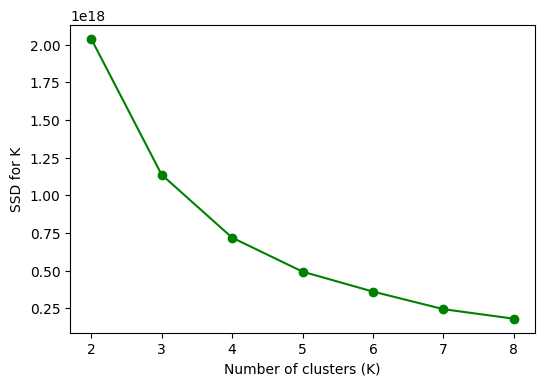

In [34]:
ssd = []
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df_kmeans)
    ssd.append(kmeans_model.inertia_)
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(range(2, 9), ssd, color="green", marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.show()

In [49]:
km = KMeans(n_clusters=3)
km.fit(df_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [44]:
km.cluster_centers_

array([[ 4.48806685e+09,  2.00000000e+00,  5.06538462e-01,
         2.19107692e+01,  2.79500000e+00,  5.00769231e-01,
         6.12038462e+00,  6.12500000e+00,  6.61653846e+00,
         5.33846154e-01,  3.42307692e-01,  1.91538462e-01,
         5.69230769e-02,  1.65017054e+04,  6.91023077e+00,
         1.79025765e+04,  2.17100769e+02,  5.06134615e+01,
         4.18346154e+00, -4.00211538e+01,  2.17100769e+01,
         1.65017054e+03,  2.23557692e+01,  2.68423077e+00,
         4.99230769e-01,  6.12500000e+00,  6.12038462e+00,
         6.66076923e+00,  5.63846154e-01,  4.16923077e-01,
         1.46923077e-01,  4.53846154e-02,  1.64975219e+04,
         6.91623077e+00,  1.79425977e+04,  2.18161154e+02,
         5.13696154e+01, -4.18346154e+00,  4.00211538e+01,
         2.18161154e+01,  1.64975219e+03],
       [ 4.44976813e+09,  1.00129199e+00,  4.92894057e-01,
         2.26182171e+01,  2.89793282e+00,  5.18733850e-01,
         6.44379845e+00,  6.24612403e+00,  6.84237726e+00,
         5.48

<Axes: xlabel='blueKills', ylabel='blueDeaths'>

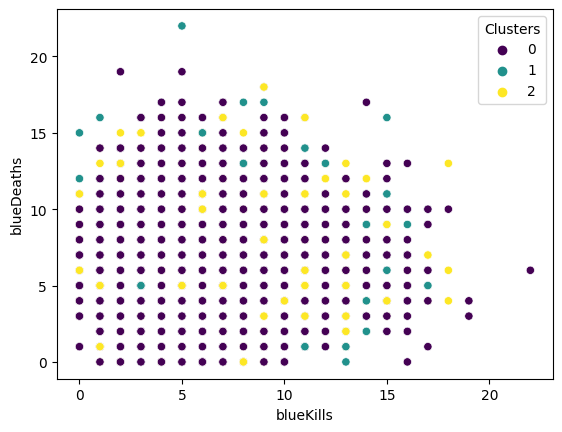

In [50]:
lol['Clusters'] = km.labels_
sns.scatterplot(x="blueKills", y="blueDeaths",hue = 'Clusters',  data=lol, palette='viridis')

# Задание

Третье исследование на собранном ранее наборе данных (он может быть дополнен или собран новый)

- произвести стандартизацию данных
- при необходимости преобразовать категориальные данные
- разделить набор данных на тренировочный и тестовый
- использовать на выбор любой метод машинного обучения из библиотеки Scikit-learn
- описать каждый шаг исследования дав пояснение и обоснование
